# 逻辑回归

### 1. 准备数据

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [4]:
# 由于鸢尾花数据有三类，而逻辑回归只能解决二分类问题，所以需要对数据处理

In [5]:
X = X[y<2, :2]
y = y[y<2]

In [6]:
X.shape

(100, 2)

In [7]:
y.shape

(100,)

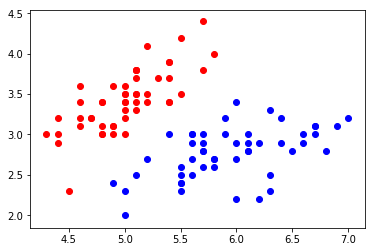

In [8]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")

### 2. 使用逻辑回归 

In [9]:
from LogisticReg.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [10]:
from LogisticReg.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [11]:
log_reg.score(X_test, y_test)

1.0

In [12]:
# 显示每个数据得概率
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [13]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [14]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [15]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [16]:
log_reg.intercept_

-0.6937719272911228

### 3. 决策边界

[![LOR4.png](https://i.postimg.cc/bvyzHdqT/LOR4.png)](https://postimg.cc/Bjz9JSLL)

- 如果 X 有两个特征，有
$$\theta_0 + \theta_1 x1 + \theta_2 x2 = 0$$
$$\Downarrow$$
$$x_2 = \frac{-\theta_0 - \theta_1 x_1}{\theta_2}$$

In [19]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

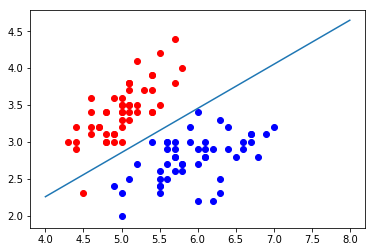

In [20]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.plot(x1_plot, x2_plot)